# Machine Learning Engineer Nanodegree
## Capstone Project

This project seeks a model which uses the top daily news headlines from Reddit (/r/worldnews) to predict stock market movement. A dataset with 8 years of daily news headlines and their respective DJIAs is available in [Kaggle](https://www.kaggle.com/aaron7sun/stocknews). The stock market movement will be modeled into a binary classification problem, where:
- 1 when DJIA Adj Close value rose or stayed as the same
- 0 when DJIA Adj Close value decreased.

Where DJIA means the Dow Jones Industrial Average Index. This notebook is divided into 5 parts as follows:

## 1. Read, Clean and Explore the Data

First let's import some basic libraries and read the dataset

In [82]:
from __future__ import division
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

In [2]:
# Load the dataset
data = pd.read_csv("Combined_News_DJIA.csv")

In [5]:
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [24]:
y_all = data['Label']
y_all.head()

0    0
1    1
2    0
3    0
4    1
Name: Label, dtype: int64

Now, let's join the 25 features into only one and then process it

In [242]:
# Join all the 25 columns into one coluns
X_all = data.iloc[:,2:27].apply(lambda x: ''.join(str(x.values)),axis=1)

In [243]:
# Visualize the first sample
X_all[0]

'[ \'b"Georgia \\\'downs two Russian warplanes\\\' as countries move to brink of war"\'\n "b\'BREAKING: Musharraf to be impeached.\'"\n "b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\'"\n "b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\'"\n \'b"Afghan children raped with \\\'impunity,\\\' U.N. official says - this is sick, a three year old was raped and they do nothing"\'\n "b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\'"\n \'b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\\\'s side"\'\n \'b"The \\\'enemy combatent\\\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it."\'\n "b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VID

We can notice many undesired tags. They are going to be removed next:

In [246]:
import re
def clean_text(text):
    text = re.sub("'b", '', text) # Remove the 'b tag
    text = re.sub('"b', '', text) # Remove the "b tag
    text = re.sub("\n", '', text) # Remove the \n tag
    text = re.sub("U.S.", 'United States', text) # Replace U.S. (only capital ones) to United States
    text = re.sub("US", 'United States', text) # Replace US (only capital ones) to United States
    text = re.sub('[\W]+', ' ', text.lower()) # Remove all non-word characters
    return text
    

Let's clean and visalize the first few samples cleaned

In [428]:
# Apply clean_text function
X_all_cleaned = X_all.apply(clean_text)

In [249]:
# Visualize the hea
X_all_cleaned.head().values

array([ ' georgia downs two russian warplanes as countries move to brink of war breaking musharraf to be impeached russia today columns of troops roll into south ossetia footage from fighting youtube russian tanks are moving towards the capital of south ossetia which has reportedly been completely destroyed by georgian artillery fire afghan children raped with impunity u n official says this is sick a three year old was raped and they do nothing 150 russian tanks have entered south ossetia whilst georgia shoots down two russian jets breaking georgia invades south ossetia russia warned it would intervene on so s side the enemy combatent trials are nothing but a sham salim haman has been sentenced to 5 1 2 years but will be kept longer anyway just because they feel like it georgian troops retreat from s osettain capital presumably leaving several hundred people killed video did the united states prep georgia for war with russia rice gives green light for israel to attack iran says united

## 2. Exploratory Data Analysis

Inspired in the project 2, let's first compute some cursory investigation:

In [188]:
# Number of Records
n_records = len(data)

# Balance of classes
not_down, down = data['Label'].value_counts()

# Percentage of values which increased or stayed at the same (value = 1)
not_down_percent = not_down/n_records*100

# Print the results
print("Total number of records: {}".format(n_records))
print("Number of records in which the index increased or stayed at the same: {}".format(not_down))
print("Number of records in which the index decreased: {}".format(down))
print("Percentage of values which increased or stayed at the same (Label == 1): {:.2f}%".format(not_down_percent))

Total number of records: 1989
Number of records in which the index increased or stayed at the same: 1065
Number of records in which the index decreased: 924
Percentage of values which increased or stayed at the same (Label == 1): 53.54%


Now, let's also plot a cloud of words using the package WordCloud:

In [205]:
from wordcloud import WordCloud

In [206]:
wordcloud = WordCloud(background_color='black', width=3000, height=2500)

In [251]:
X_all_cleaned_join = ' '.join(X_all_cleaned.values)

In [254]:
wordcloud.generate(X_all_cleaned_join)

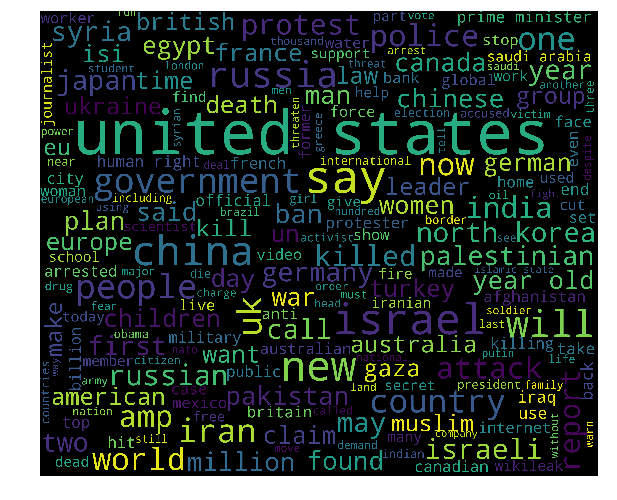

In [257]:
plt.figure(1,figsize=(10,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [264]:
X_all_cleaned_pos = X_all_cleaned[data['Label']==1]
X_all_cleaned_neg = X_all_cleaned[data['Label']==0]

In [265]:
X_all_cleaned_pos_join = ' '.join(X_all_cleaned_pos.values)
X_all_cleaned_neg_join = ' '.join(X_all_cleaned_neg.values)

#### Cloud of words for the positive class

In [266]:
# Generate the wordcloud instance
wordcloud.generate(X_all_cleaned_pos_join)

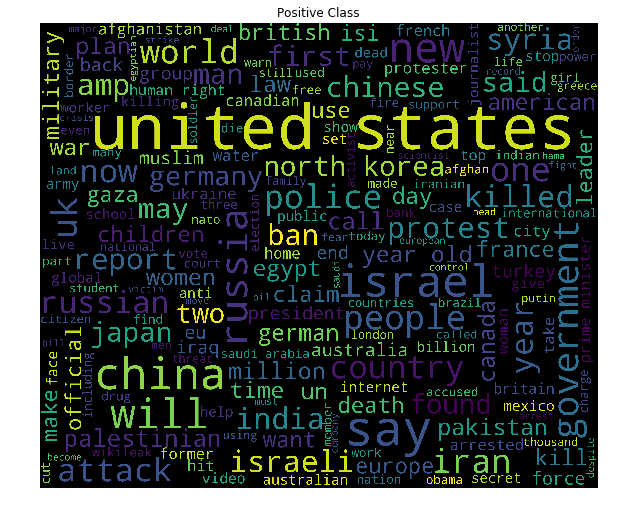

In [267]:
# Print the cloud of words
plt.figure(1,figsize=(10,20))
plt.imshow(wordcloud)
plt.title('Positive Class')
plt.axis('off')
plt.show()

#### Cloud of words for the negative class

In [269]:
# Generate the wordcloud instance
wordcloud.generate(X_all_cleaned_neg_join)

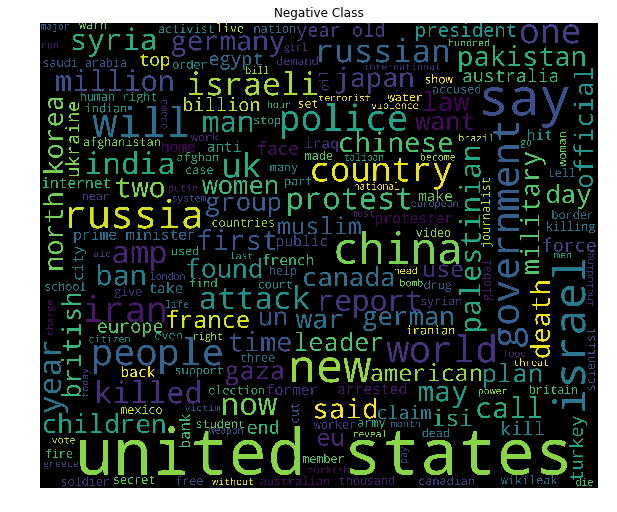

In [271]:
# Print the cloud of words
plt.figure(1,figsize=(10,20))
plt.imshow(wordcloud)
plt.title('Negative Class')
plt.axis('off')
plt.show()

## 2. Preparing the Data

### Training and Test Split
The most recent two years are going to be used as test set and the previous 6 years of data as training set. Let's first check the full range of the dataset:


In [71]:
date_min = min(data['Date'])
date_max = max(data['Date'])

print 'The dataset ranges from {} to {}'.format(date_min, date_max)

The dataset ranges from 2008-08-08 to 2016-07-01


Now, let's check which index would represent about 80% of the dataset

In [76]:
idx = int(0.8*len(data))
print 'The index representing 80% of the data is {}'.format(idx)
print 'The index {} is the date {}'.format(idx, data['Date'][idx])

The index representing 80% of the data is 1591
The index 1591 is the date 2014-12-03


Since '2014-12-03' is close to 2015, and in order to be consistent and allow us to compare with secondary benchmarks from kaggle, let's use instead as test set all the samples starting from 2015 which should still approximatelly represent 80%. Let's first check the first date in the dataset from 2015:

In [98]:
start_date = '2015-01-01'
test_date = min(data[data['Date']>=start_date]['Date'])

print 'The first date in the dataset from 2015 is {}'.format(test_date)

The first date in the dataset from 2015 is 2015-01-02


Now, let's get this index and check the proportion

In [121]:
test_idx = int(data[data['Date']==test_date].index.values)

print 'The index of the date {} is {} and represents {} of the dataset'.format(test_date, test_idx, test_idx/len(data))

The index of the date 2015-01-02 is 1611 and represents 0.809954751131 of the dataset


With this approximation, we still have about 81% of the dataset as training and 19% of the dataset as test set. Let's now perform the train/test split from 2015:

In [131]:
# Split the dataset (without shuffling) into taking 'test_idx' as reference for division
X_train = X_all[:test_idx]
y_train = y_all[:test_idx]
X_test = X_all[test_idx:]
y_test = y_all[test_idx:]

print 'Training set has {} samples and test set has {} samples'.format(len(X_train), len(X_test))

Training set has 1611 samples and test set has 378 samples


In [202]:
print "Class Balance in the Training set"
print y_train.value_counts()/len(y_train)*100

Class Balance in the Training set
1    54.189944
0    45.810056
Name: Label, dtype: float64


In [203]:
print "Class Balance in the Test set"
y_test.value_counts()/len(y_test)*100

Class Balance in the Test set


1    50.793651
0    49.206349
Name: Label, dtype: float64


### Data Preprocessing
Some preprocessing functions are presented here. However, they are only going to be used/evaluated later using pipelines.

In [138]:
def tokenizer(text):
    return text.split()

In [139]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()
    
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [140]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wittmann/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## 3. Training and Evaluating Models
As ML algorithms, it is going to be evaluated Logistic Regression, SVM (Stochastic Gradient Descent in case it is too slow), maybe XGBoost, and some other might be considered as well. 

### Benchmark with a Dummy predictor

In [336]:
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import make_pipeline

Let's first get the AUC score from a Dummy estimator in order to compare with more advanced techniques. A pipeline with the `CountVectorizer()` vectorizer and the dummy estimator `DummyClassifier()` as steps is going to be created. `CountVectorizer()` is suposedly the simplest vectorizer and that's why is chosen. `DummyClassifier()` performs as default a “stratified” prediction which generates predictions by respecting the training set’s class distribution. As instructed in [this reference](https://stackoverflow.com/questions/47006566/why-do-people-use-second-column-of-predict-proba-i-e-predict-probax-1-f) we should use the second column of `predict_proba`, for example `predict_proba(X_test)[:,1]`:

In [353]:
# Create a pipeline with a simple vectorizer and a dummy estimator
dummy_pipe = make_pipeline(CountVectorizer(), DummyClassifier(random_state=42))

# Fit the pipeline
dummy_pipe.fit(X_train, y_train)

# Get the probability score from the positive class (second column)
y_score = dummy_pipe.predict_proba(X_test)[:,1]

# Get the AUC score
dummy_score = roc_auc_score(y_test, y_score)

# Print results
print 'The AUC score for a Dummy estimator is {:.2f}%'.format(dummy_score*100)

The AUC score for a Dummy estimator is 49.13%


### Supervised Learning Models

Now, let's compare the dummy score with a few estimators. First, with a `LogisticRegression` model:

In [354]:
# Create a pipeline with a simple vectorizer and the Logistic Regression estimator
lr_pipe = make_pipeline(CountVectorizer(), LogisticRegression(random_state=42))

# Fit the pipeline
lr_pipe.fit(X_train, y_train)

# Get the probability score from the positive class (second column)
y_score = lr_pipe.predict_proba(X_test)[:,1]

# Get the AUC score
lr_score = roc_auc_score(y_test, y_score)

# Print results
print 'The AUC score for the Logistic Regression estimator is {:.2f}%'.format(lr_score*100)

The AUC score for the Logistic Regression estimator is 41.36%


That's weird.. The estimator is performing worse. Let's check the training score:

In [357]:
y_score = lr_pipe.predict_proba(X_train)[:,1]

# Get the AUC score
lr_score = roc_auc_score(y_train, y_score)

# Print results
print 'The AUC score for the Logistic Regression estimator is {:.2f}%'.format(lr_score*100)

The AUC score for the Logistic Regression estimator is 100.00%


It seems the model is overfitting to the training set. This is probably due to a very sparse and high number of features. Let's check how many features we have in the training set:

In [369]:
# Create a bag of words from the training set
count = CountVectorizer()
X_train_vect = count.fit_transform(X_train)

# Check the size of the training set
print 'The shape of the training set is {}'.format(X_train_vect.toarray().shape)

The shape of the training set is (1611, 32264)


We can observe that the number of features in the training set is about 20 times higher than the number of samples. The model would likely suffer from overfitting. In order to handle the overfitting problem let's check how the performance changes when varying the parameter `max_features` in CountVectorizer:

In [386]:
max_features_list = [1, 5, 10, 20, 25, 30, 40, 50, 60, 80, 100, 150, 200]


for max_f in max_features_list:
    # Create a pipeline with a simple vectorizer and the Logistic Regression estimator
    lr_pipe = make_pipeline(CountVectorizer(max_features=max_f), LogisticRegression(random_state=42))

    # Fit the pipeline
    lr_pipe.fit(X_train, y_train)

    # Get the probability score for the training set
    y_score_train = lr_pipe.predict_proba(X_train)[:,1]

    # Get the probability score for the testing set
    y_score_test = lr_pipe.predict_proba(X_test)[:,1]

    # Report the accuracies
    print 'Using max_features = {}'.format(max_f)
    print 'The AUC score for the training set is {:.2f}%'.format(roc_auc_score(y_train, y_score_train)*100)
    print 'The AUC score for the test set is {:.2f}%'.format(roc_auc_score(y_test, y_score_test)*100)
    print '='*80

Using max_features = 1
The AUC score for the training set is 51.14%
The AUC score for the test set is 57.97%
Using max_features = 5
The AUC score for the training set is 53.19%
The AUC score for the test set is 57.73%
Using max_features = 10
The AUC score for the training set is 54.49%
The AUC score for the test set is 53.95%
Using max_features = 20
The AUC score for the training set is 55.17%
The AUC score for the test set is 53.61%
Using max_features = 25
The AUC score for the training set is 56.76%
The AUC score for the test set is 51.43%
Using max_features = 30
The AUC score for the training set is 57.27%
The AUC score for the test set is 52.67%
Using max_features = 40
The AUC score for the training set is 57.82%
The AUC score for the test set is 52.77%
Using max_features = 50
The AUC score for the training set is 58.48%
The AUC score for the test set is 54.09%
Using max_features = 60
The AUC score for the training set is 61.00%
The AUC score for the test set is 51.97%
Using max_fe

The best test score was with max_features = 1, however the training score was lower than the test score which does not make sense - a model performing better with unseen data than with the data that it was training. Probably this is due a high bias problem. Later, this parameter should be evaluated in the hyperparameter optimization process. For now, we will be using the value of max_features = 50 which led to the highest test score and still has the training score higher than the test score. The final result is the following:
- ** Test score for Logistic Regression (with `max_features = 50`)** = 54.09%

Next, let's remove the stop words and check if the performance improves:

In [388]:
max_features_list = [1, 5, 10, 20, 25, 30, 40, 50, 60, 80, 100, 150, 200]


for max_f in max_features_list:
    # Create a pipeline with a simple vectorizer and the Logistic Regression estimator
    lr_pipe = make_pipeline(CountVectorizer(max_features=max_f, stop_words=stop), LogisticRegression(random_state=42))

    # Fit the pipeline
    lr_pipe.fit(X_train, y_train)

    # Get the probability score for the training set
    y_score_train = lr_pipe.predict_proba(X_train)[:,1]

    # Get the probability score for the testing set
    y_score_test = lr_pipe.predict_proba(X_test)[:,1]

    # Report the accuracies
    print 'Using max_features = {}'.format(max_f)
    print 'The AUC score for the training set is {:.2f}%'.format(roc_auc_score(y_train, y_score_train)*100)
    print 'The AUC score for the test set is {:.2f}%'.format(roc_auc_score(y_test, y_score_test)*100)

Using max_features = 1
The AUC score for the training set is 52.34%
The AUC score for the test set is 46.58%
Using max_features = 5
The AUC score for the training set is 53.13%
The AUC score for the test set is 51.30%
Using max_features = 10
The AUC score for the training set is 53.24%
The AUC score for the test set is 50.71%
Using max_features = 20
The AUC score for the training set is 56.44%
The AUC score for the test set is 51.69%
Using max_features = 25
The AUC score for the training set is 59.07%
The AUC score for the test set is 48.30%
Using max_features = 30
The AUC score for the training set is 59.94%
The AUC score for the test set is 46.84%
Using max_features = 40
The AUC score for the training set is 61.19%
The AUC score for the test set is 45.82%
Using max_features = 50
The AUC score for the training set is 61.74%
The AUC score for the test set is 46.40%
Using max_features = 60
The AUC score for the training set is 62.45%
The AUC score for the test set is 46.83%
Using max_fe

Apparently the usage of stop words makes the performance worse. Now, let's test some other estimators besides Logistic Regression:

In [418]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


classifiers_names = ["k Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "AdaBoost", "GradientBoost",
         "Gaussian Naive Bayes"]

classifiers_list = [KNeighborsClassifier(3),
                    SVC(kernel="linear", C=0.025, probability=True, random_state=42),
                    SVC(gamma=2, C=1, probability=True, random_state=42),
                    DecisionTreeClassifier(max_depth=5, random_state=42),
                    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42),
                    AdaBoostClassifier(random_state=42),
                    GradientBoostingClassifier(random_state=42),
                    GaussianNB()]

In [397]:
# Using https://stackoverflow.com/questions/28384680/scikit-learns-pipeline-a-sparse-matrix-was-passed-but-dense-data-is-required
# When training GaussianNB, the error 'use X.toarray() to convert to a dense numpy array' which required this class
# as intermediate process in the pipeline
# Also this is a good reference: http://zacstewart.com/2014/08/05/pipelines-of-featureunions-of-pipelines.html

from sklearn.base import TransformerMixin

class DenseTransformer(TransformerMixin):

    def transform(self, X, y=None, **fit_params):
        return X.todense()

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y, **fit_params)
        return self.transform(X)

    def fit(self, X, y=None, **fit_params):
        return self

#### Without using stop words

In [401]:
for name, clf in zip(classifiers_names, classifiers_list):
    # Create a pipeline with a simple vectorizer and the Logistic Regression estimator
    if name != "Gaussian Naive Bayes":
        clf_pipe = make_pipeline(CountVectorizer(max_features=50), clf)
    else:
        clf_pipe = make_pipeline(CountVectorizer(max_features=50), DenseTransformer(), clf)
            

    # Fit the pipeline
    clf_pipe.fit(X_train, y_train)

    # Get the probability score for the training set
    y_score_train = clf_pipe.predict_proba(X_train)[:,1]

    # Get the probability score for the testing set
    y_score_test = clf_pipe.predict_proba(X_test)[:,1]

    # Report the accuracies
    print 'Using the estimator: {}'.format(name)
    print 'The AUC score for the training set is {:.2f}%'.format(roc_auc_score(y_train, y_score_train)*100)
    print 'The AUC score for the test set is {:.2f}%'.format(roc_auc_score(y_test, y_score_test)*100)
    print '='*80

Using the estimator: k Nearest Neighbors
The AUC score for the training set is 82.73%
The AUC score for the test set is 49.69%
Using the estimator: Linear SVM
The AUC score for the training set is 41.91%
The AUC score for the test set is 45.41%
Using the estimator: RBF SVM
The AUC score for the training set is 0.00%
The AUC score for the test set is 50.00%
Using the estimator: Decision Tree
The AUC score for the training set is 56.73%
The AUC score for the test set is 48.71%
Using the estimator: Random Forest
The AUC score for the training set is 70.72%
The AUC score for the test set is 51.80%
Using the estimator: AdaBoost
The AUC score for the training set is 69.75%
The AUC score for the test set is 52.54%
Using the estimator: GradientBoost
The AUC score for the training set is 88.76%
The AUC score for the test set is 49.48%
Using the estimator: Gaussian Naive Bayes
The AUC score for the training set is 60.08%
The AUC score for the test set is 54.53%


#### Using Stop Words

In [419]:
for name, clf in zip(classifiers_names, classifiers_list):
    # Create a pipeline with a simple vectorizer and the Logistic Regression estimator
    if name != "Gaussian Naive Bayes":
        clf_pipe = make_pipeline(CountVectorizer(max_features=50, stop_words=stop), clf)
    else:
        clf_pipe = make_pipeline(CountVectorizer(max_features=50, stop_words=stop), DenseTransformer(), clf)
            

    # Fit the pipeline
    clf_pipe.fit(X_train, y_train)

    # Get the probability score for the training set
    y_score_train = clf_pipe.predict_proba(X_train)[:,1]

    # Get the probability score for the testing set
    y_score_test = clf_pipe.predict_proba(X_test)[:,1]

    # Report the accuracies
    print 'Using the estimator: {}'.format(name)
    print 'The AUC score for the training set is {:.2f}%'.format(roc_auc_score(y_train, y_score_train)*100)
    print 'The AUC score for the test set is {:.2f}%'.format(roc_auc_score(y_test, y_score_test)*100)
    print '='*80

Using the estimator: k Nearest Neighbors
The AUC score for the training set is 83.99%
The AUC score for the test set is 51.16%
Using the estimator: Linear SVM
The AUC score for the training set is 61.48%
The AUC score for the test set is 45.70%
Using the estimator: RBF SVM
The AUC score for the training set is 0.00%
The AUC score for the test set is 50.77%
Using the estimator: Decision Tree
The AUC score for the training set is 62.51%
The AUC score for the test set is 49.54%
Using the estimator: Random Forest
The AUC score for the training set is 66.47%
The AUC score for the test set is 56.24%
Using the estimator: AdaBoost
The AUC score for the training set is 67.34%
The AUC score for the test set is 50.60%
Using the estimator: GradientBoost
The AUC score for the training set is 85.14%
The AUC score for the test set is 49.23%
Using the estimator: Gaussian Naive Bayes
The AUC score for the training set is 61.88%
The AUC score for the test set is 45.91%


It seems the most promissing estimator is RandomForest. 

### Benchmark Summary (AUC test scores)
Before going to the hyperparameter optimization section, let's  summarize the scores most relevant scores obtained so far:
- **Dummy Estimator** = 49.13%
- ** Logistic Regression (with `max_features = 50`)** = 54.09%
- **Naive Bayes (with `max_features = 50`)** = 54.53%
- **Random Forest (with `max_features = 50` and stop words)** = 56.24%

## 4. Hyperparameter Optimization
Now let's apply hyperparameter optimization to the Random Forest estimator since it performed better in the previous tests:


In [426]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [438]:
# Random Forest Pipeline
rf_pipe = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', RandomForestClassifier(random_state=42))])


In [467]:
# Grid of parameters for Random Forest 
param_grid_rf = [{'vect__tokenizer': [tokenizer,
                                tokenizer_porter],
             'vect__stop_words': [stop, None],
             'vect__max_features': [10, 50, 100],
             #'tfidf__use_idf': (True, False),
             #'clf__n_estimators': (10, 50, 100),
             #'clf__max_depth': [None, 5, 20, 50],
             #'clf__max_features': [1, 'auto', None]
             }]

In [468]:
# Initialize the GridSearchCV
gs_rf_pipe = GridSearchCV(rf_pipe, param_grid_rf, scoring='roc_auc', cv=5, verbose=3, n_jobs=4)

# Fit the pipeline
gs_rf_pipe.fit(X_train, y_train)

print('Best parameter set: %s ' % gs_rf_pipe.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] vect__tokenizer=<function tokenizer at 0x11269c938>, vect__max_features=10, vect__stop_words=[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u"you're", u"you've", u"you'll", u"you'd", u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u"she's", u'her', u'hers', u'herself', u'it', u"it's", u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u"that'll", u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out',

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  2.8min


[CV]  vect__tokenizer=<function tokenizer_porter at 0x113c28410>, vect__max_features=10, vect__stop_words=None, score=0.477187426695, total=  34.1s
[CV] vect__tokenizer=<function tokenizer_porter at 0x113c28410>, vect__max_features=50, vect__stop_words=[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u"you're", u"you've", u"you'll", u"you'd", u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u"she's", u'her', u'hers', u'herself', u'it', u"it's", u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u"that'll", u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'du

[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  7.1min finished


Best parameter set: {'vect__tokenizer': <function tokenizer at 0x11269c938>, 'vect__stop_words': [u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u"you're", u"you've", u"you'll", u"you'd", u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u"she's", u'her', u'hers', u'herself', u'it', u"it's", u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u"that'll", u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'the

In [469]:
best_clf = gs_rf_pipe.best_estimator_

# Get the probability score for the training set
y_score_train = best_clf.predict_proba(X_train)[:,1]

# Get the probability score for the testing set
y_score_test = best_clf.predict_proba(X_test)[:,1]

# Report the accuracies
print 'The AUC score for the training set is {:.2f}%'.format(roc_auc_score(y_train, y_score_train)*100)
print 'The AUC score for the test set is {:.2f}%'.format(roc_auc_score(y_test, y_score_test)*100)

The AUC score for the training set is 99.91%
The AUC score for the test set is 51.73%


Let's also optimize Logistic Regression. 

In [512]:
# Logistic Regression Pipeline
lr_pipe = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', LogisticRegression(random_state=42))])

In [513]:
# Grid of parameters for Random Forest 
param_grid_lr = [{'vect__tokenizer': [tokenizer,
                                tokenizer_porter],
             'vect__stop_words': [stop, None],
             'vect__max_features': [10, 50, 100],
             #'tfidf__use_idf': (True, False),
             #'clf__n_estimators': (10, 50, 100),
             #'clf__max_depth': [None, 5, 20, 50],
             #'clf__max_features': [1, 'auto', None]
             }]

In [514]:
# Initialize the GridSearchCV
gs_lr_pipe = GridSearchCV(lr_pipe, param_grid_lr, scoring='roc_auc', cv=3, verbose=3, n_jobs=4)

# Fit the pipeline
gs_lr_pipe.fit(X_train, y_train)

print('Best parameter set: %s ' % gs_lr_pipe.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] vect__tokenizer=<function tokenizer at 0x11269c938>, vect__max_features=10, vect__stop_words=[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u"you're", u"you've", u"you'll", u"you'd", u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u"she's", u'her', u'hers', u'herself', u'it', u"it's", u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u"that'll", u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out',

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  2.3min


[CV]  vect__tokenizer=<function tokenizer_porter at 0x113c28410>, vect__max_features=50, vect__stop_words=None, score=0.484214790602, total=  26.6s
[CV] vect__tokenizer=<function tokenizer_porter at 0x113c28410>, vect__max_features=100, vect__stop_words=[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u"you're", u"you've", u"you'll", u"you'd", u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u"she's", u'her', u'hers', u'herself', u'it', u"it's", u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u"that'll", u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'd

[Parallel(n_jobs=4)]: Done  36 out of  36 | elapsed:  3.6min finished


Best parameter set: {'vect__tokenizer': <function tokenizer at 0x11269c938>, 'vect__stop_words': [u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u"you're", u"you've", u"you'll", u"you'd", u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u"she's", u'her', u'hers', u'herself', u'it', u"it's", u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u"that'll", u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'the

In [491]:
best_clf = gs_lr_pipe.best_estimator_

# Get the probability score for the training set
y_score_train = best_clf.predict_proba(X_train)[:,1]

# Get the probability score for the testing set
y_score_test = best_clf.predict_proba(X_test)[:,1]

# Report the accuracies
print 'The AUC score for the training set is {:.2f}%'.format(roc_auc_score(y_train, y_score_train)*100)
print 'The AUC score for the test set is {:.2f}%'.format(roc_auc_score(y_test, y_score_test)*100)

The AUC score for the training set is 61.50%
The AUC score for the test set is 46.11%


## 5. Test Set Results
The model with the highest validation score is going to be used to evaluate the test set. First a free-form visualization that summarizes the results of this project:


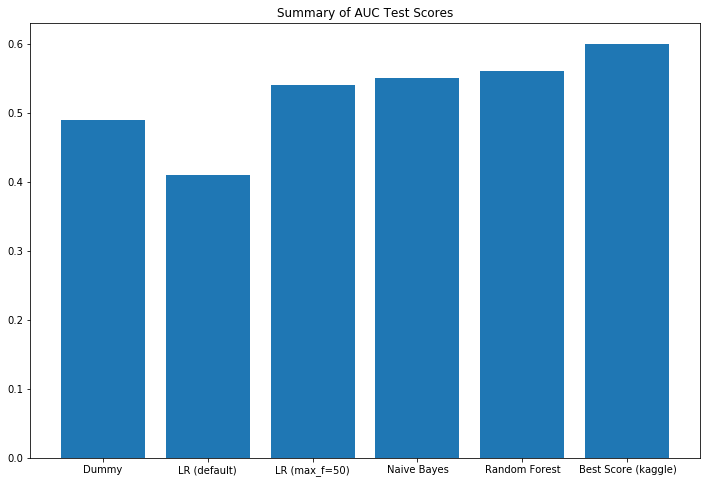

In [511]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(6)
scores = [0.49, 0.41, 0.54, 0.55, 0.56, 0.6]


fig, ax = plt.subplots(figsize=(12,8))
plt.bar(x, scores)
plt.xticks(x, ('Dummy', 'LR (default)', 'LR (max_f=50)', 'Naive Bayes', 'Random Forest', 'Best Score (kaggle)'))
plt.title('Summary of AUC Test Scores')
plt.show()